# Workshop PR02: Machine Learning Kickoff

## Agenda 
- Preparing the data for modelling
- Introduction to ML frameworks and algorithms 
    - Supervised Learning: sklearn
    - Deep Learning: tensorflow

## Previously on the last workshop
From last workshop we know how to do the following:
- Read the data: IEEE fraud detection dateset [(download it here)](https://www.kaggle.com/c/ieee-fraud-detection/data)
- Join the identify and transaction dataset together

## Exercise 
- find out whether feature selection would boost performance


If you have forgotten, these are from the last workshop:

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv file into a dataframe
df_id_train = pd.read_csv("train_identity.csv")
df_tran_train = pd.read_csv("train_transaction.csv")
df_id_test = pd.read_csv("test_identity.csv")
df_tran_test = pd.read_csv("test_transaction.csv")

In [3]:
# joining table
df_train = pd.merge(df_tran_train,df_id_train, on='TransactionID' ,how='left')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [4]:
# target dataframe 
Y_train = df_train['isFraud']
Y_train = pd.DataFrame(Y_train)
Y_train.head()

,isFraud
0,0
1,0
2,0
3,0
4,0


In [5]:
# dropping the irrelevant data for training
list = ['isFraud','TransactionID','DeviceInfo']
X_train = df_train.drop(list, axis=1)
X_train.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType
0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 431 entries, TransactionDT to DeviceType
dtypes: float64(399), int64(2), object(30)
memory usage: 1.9+ GB


## Prepping the data
- Encode string data into float
- Remove low quality data/engineer high quality data (Feature Selection/Engineering)

### String Encoding

There are many (30) features in string format, so we need to encode them into float before we can use them for training. 

In [7]:
obj_df = X_train.select_dtypes(include=['object']).copy()
int_df = X_train.select_dtypes(include=['int64']).copy()
float_df = X_train.select_dtypes(include=['float64']).copy()

for column in obj_df.head(0):
    obj_df[column] = obj_df[column].astype('category')
    obj_df[column] = obj_df[column].cat.codes

X_train = pd.concat([obj_df,int_df,float_df],axis=1, sort=False) 
X_train.head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,4,1,1,-1,-1,1,1,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,2,1,16,-1,-1,-1,-1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,3,2,35,-1,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,2,53,-1,-1,-1,-1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2,1,16,-1,-1,-1,-1,-1,-1,...,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,32.0


Now we can see which objects are encoded into int. Note: -1 means NaN. 

In [17]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 30 columns):
ProductCD        590540 non-null int8
card4            590540 non-null int8
card6            590540 non-null int8
P_emaildomain    590540 non-null int8
R_emaildomain    590540 non-null int8
M1               590540 non-null int8
M2               590540 non-null int8
M3               590540 non-null int8
M4               590540 non-null int8
M5               590540 non-null int8
M6               590540 non-null int8
M7               590540 non-null int8
M8               590540 non-null int8
M9               590540 non-null int8
id_12            590540 non-null int8
id_15            590540 non-null int8
id_16            590540 non-null int8
id_23            590540 non-null int8
id_27            590540 non-null int8
id_28            590540 non-null int8
id_29            590540 non-null int8
id_30            590540 non-null int8
id_31            590540 non-null int16
id_33         

Now to be uniform, we'll change all NaN into -1 in other non-object columns as well.  

In [9]:
X_train.fillna(value=-1,inplace=True)
print(X_train.isnull().values.any()) # False means there isn't any NaN

False


### Feature Selection

There are way too many features (over 400!) to train the model efficiently, so we're going to narrow down to the more important features. Now there are many ways to shrink our high-dimensional dataset, and we will show the followings:
- Variance Threshold 
- Univariate Feature Selection  
- Recursive Feature Elimination 
- Select From Model (linear-based, tree-based)
- As a part of pipeline

Mote detail: https://scikit-learn.org/stable/modules/feature_selection.html

#### 1) Variance Threshols

Removes the features that have low variance. For example, the default is to remove all features with the same entries. 

In [18]:
from sklearn.feature_selection import VarianceThreshold
# for boolean features, we want to remove all features that 
# are either one or zero (on or off) in more than 80% of the samples
VT = VarianceThreshold(threshold=(.8 * (1 - .8))) # variance of Bernoulli is p(1-p)
# for multinomial variables, variance depends on the number of categories,
# but for convenience we'll use the same formula
X_train_VT = VT.fit_transform(X_train)
X_train_VT.shape

(590540, 393)

OK now we have reduced to 393 features. Before we move to the next method of feature selection, let's fit into a model (we use Random Forest here) and see how it goes.  

In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_VT, Y_train)
random_forest.score(X_train_VT, Y_train) 

0.9967148711348934

In [18]:
random_forest.fit(X_train, Y_train) # this is without feature selection
random_forest.score(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.9967047109425272

Not bad eh, but don't get too excited now since this is only train error. When we move to the next workshop we will show how we should train models properly by using test error. 

#### 2) Univariate Feature Selection

Univariate feature selection selects the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. What statistical test is used to score the features depends on whether it's a regression or classification problem. 
- For regression: `f_regression` ,`mutual_info_regression`
- For classification: `chi2`, `f_classif`, `mutual_info_classif`

Also you can choose how to select the features based on the scores:
- `SelectKBest`: select the k highest scoring features
- `SelectPercentile`: select the user-specified highest scoring percentage of features
- Common univariate statistical tests for each feature: false positive rate `SelectFpr`, false discovery rate `SelectFdr`, or family wise error `SelectFwe`
- `GenericUnivariateSelect`: "allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator"

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
# select the 200 best features based on ANOVA F-value
X_train_Kbest = SelectKBest(f_classif, k=200).fit_transform(X_train, Y_train)
X_train_Kbest.shape

(590540, 200)

In [21]:
# so what are the first 20 features
X_train.columns[SelectKBest(f_classif, k=20).fit(X_train, Y_train).get_support()]

Index(['V170', 'V171', 'V176', 'V186', 'V188', 'V189', 'V190', 'V199', 'V200',
       'V201', 'V222', 'V228', 'V230', 'V242', 'V243', 'V244', 'V246', 'V257',
       'V258', 'V259'],
      dtype='object')

Now apart from choosing the K highest scores features, we can also choose according to a percentile of the highest scores (e.g. top 50% of the best features). 

In [22]:
from sklearn.feature_selection import SelectPercentile
X_train_Pbest = SelectPercentile(f_classif, percentile=50).fit_transform(X_train, Y_train)
X_train_Pbest.shape

(590540, 215)

So 215 features are chosen based on the 50% percentile.

#### 3) Recursive Feature Elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination ([RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) or [RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)) selects features by recursively considering smaller and smaller sets of features untill the desired number of features is reached:
1. The chosen estimator is trained on the initial set of features and the importance of each feature is obtained either through a `coef_` attribute or through a `feature_importances_` attribute. 
2. The least important features are pruned from current set of features. 
3. Repeat 1 and 2 on the pruned set until the desired number of features is obbtained.


RFECV performs RFE in a cross-validation loop to find the optimal number of features, i.e. it removes all the features and calculates the CV error.

In [23]:
# this cell is optional: run this if you don't want to read the future warning messages
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# this is to stop the format warning
Y_train = np.array(Y_train).ravel()

The following cell might take a while (5 minutes), while it's running have a break! Or skip this part.

In [24]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
estimator = SGDClassifier()
rfecv = RFECV(estimator,verbose=True, 
              cv=3,step=0.1) 
#step means the number/percentage of features to be removed each loop
X_train_refcv = rfecv.fit_transform(X_train, Y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Fitting estimator with 431 features.
Fitting estimator with 388 features.
Fitting estimator with 345 features.
Fitting estimator with 302 features.
Fitting estimator with 259 features.
Fitting estimator with 216 features.
Fitting estimator with 173 features.
Fitting estimator with 130 features.
Fitting estimator with 87 features.
Fitting estimator with 44 features.
Fitting estimator with 431 features.
Fitting estimator with 388 features.
Fitting estimator with 345 features.
Fitting estimator with 302 features.
Fitting estimator with 259 features.
Fitting estimator with 216 features.
Fitting estimator with 173 features.
Fitting estimator with 130 features.
Fitting estimator with 87 features.
Fitting estimator with 44 features.
Fitting estimator with 431 features.
Fitting estimator with 388 features.
Fitting estimator with 345 features.
Fitting estimator with 302 features.
Fitting estimator with 259 features.
Fitting estimator with 216 features.
Fitting estimator with 173 features.
Fitti

<Figure size 640x480 with 1 Axes>

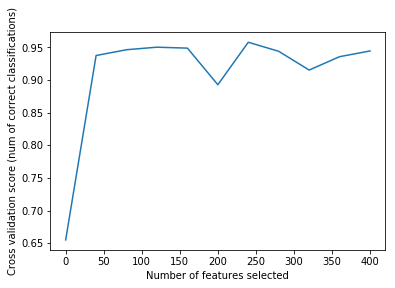

In [26]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (num of correct classifications)")
plt.plot(range(0, 40*len(rfecv.grid_scores_),40), rfecv.grid_scores_)
plt.show()

#### 4) Feature Selection using `SelectFromModel`

As the name suggests, features are selected from a model that assigns importance to features. `SelectFromModel` is a meta-transformer that can be used along with any estimator that has a `coef_` or `feature_importances_` attribute after fitting. The unimportant features are remoced if the corresponding `coef_` or `feature_importances_` values are below the certain threshold. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”.

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier() # model
sfm = SelectFromModel(model_sgd) # assigning model
sfm.fit(X_train, Y_train) # fitting data
X_train_sgd = sfm.transform(X_train) # transform full dataset to reduced dataset
features_selected = X_train.columns[sfm.get_support()] # get the selected features
print(X_train_sgd.shape)
print(features_selected)

(590540, 65)
Index(['TransactionDT', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2',
       'C2', 'C13', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V126',
       'V127', 'V128', 'V131', 'V132', 'V133', 'V134', 'V159', 'V160', 'V164',
       'V165', 'V202', 'V203', 'V204', 'V207', 'V211', 'V212', 'V213', 'V215',
       'V263', 'V264', 'V265', 'V273', 'V274', 'V275', 'V306', 'V307', 'V308',
       'V309', 'V310', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318',
       'V331', 'V332', 'V333', 'V338', 'V339', 'id_02', 'id_11', 'id_14',
       'id_17', 'id_19', 'id_20'],
      dtype='object')


In [24]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier().fit(X_train, Y_train)
X_train_rf = SelectFromModel(model_rf,prefit=True).transform(X_train)
X_train_rf.shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


(590540, 112)

#### 5) Feature Selection as Part of a Pipeline
Pipeline of transforms with a final estimator.

Feature selection is usually used as a pre-processing step before doing the actual learning. The recommended way to do this in scikit-learn is to use a `sklearn.pipeline.Pipeline`.

The following part is straight from [this link](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline):

Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using `memory` argument.

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to ‘passthrough’ or `None`.

In [28]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', SelectFromModel(model_sgd)), 
    #feature_selection can be any method mentioned above
  ('classification', RandomForestClassifier())
    #to be consistent we use random forest classifier again
])
clf.fit(X_train, Y_train)
clf.score(X_train, Y_train)

0.9958681884377011

That's it for this workshop!

So we have learned some methods of dealing with high dimemsional data, but also bear in mind that sometimes when we have smaller dataset (less than 10 features or so), instead of **feature selection** we need to do **feature engineering**, which could be as simple as creating simple features such as speed (if we are given time and distance), or it could be as complicated as obtaining new data such as distance to the city (if we are given locations). 

The reason why we spend some much effort on prepping the data is because of the well-known "garbage-in-garbage-out", as well as the intention of training the model more efficiently and avoiding over-fitting. 

Note that we have only shown classification example, for regression problems you might need to alter something (e.g. we can use lasso for regression) and the links provided should contain enough information to get you started. There are also other techniques for data reduction such as [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) but we'll just leave that part for you to explore as this could be done quiet easily. 

Next workshop we will dive into model training. (Yay!) 